# Основы статистики

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = px.data.gapminder()

In [3]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


## Основные статистические показатели

### Среднее (mean)

In [11]:

# Для простоты выберем один год из данных

data = df[df["year"] == 2002]
# Сделаем сначала руками (по формуле)
gdp_list = data['gdpPercap'].tolist()
mean_gdp = sum(gdp_list) / len(gdp_list)


# Затем используем встроенные функции
mean_gdp_plotly = data['gdpPercap'].mean()

# Сравним результаты
print(mean_gdp)
print(mean_gdp_plotly)





9917.848364685913
9917.848364685917


### Медиана

In [12]:
def median(values):
    sorted_vals = sorted(values)
    n = len(sorted_vals)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_vals[mid - 1] + sorted_vals[mid]) / 2
    else:
        return sorted_vals[mid]

In [ ]:
# Медиана с помощью кастомной функции
median_gdp_handly = median(data['gdpPercap'])
median_gdp_handly


5319.804523999999

In [ ]:
# Медиана с помощью Plotly
median_gdp_plotly = data['gdpPercap'].median()
median_gdp_plotly

np.float64(5319.804523999999)

### Мода

In [18]:
from collections import Counter

def rounded_mode(values, base=100):
    rounded = [round(x / base) * base for x in values]
    freq = Counter(rounded)
    most_common = freq.most_common(1)[0]
    return most_common[0], most_common[1]


In [19]:
mode_gdp_handly = rounded_mode(data['gdpPercap'])
mode_gdp_handly


(900, 7)

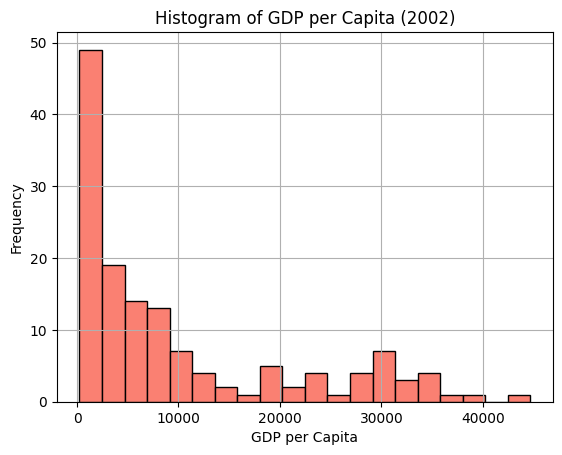

In [ ]:
# График ВВП на 2002 год

import matplotlib.pyplot as plt

plt.hist(gdp_list, bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of GDP per Capita (2002)')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
